<a href="https://colab.research.google.com/github/Vonewman/Algorithme/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equation normal

In [0]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x0 + bruit gaussien
# 
X_b = np.c_[np.ones((100, 1)), X] # ajouter x0 = 1 à chaque observation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Calcul de theta à l'aide de l'équation normale

In [3]:
theta_best

array([[4.13457185],
       [2.87617303]])

# Prédiction à l'aide de theta

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # ajouter x = 1 à chaque obs
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13457185],
       [9.88691792]])

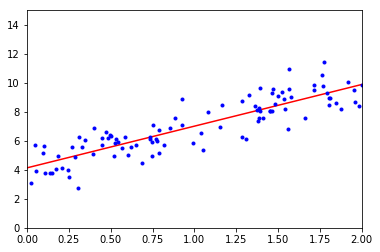

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Le code implémenter avec scikit-learn

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()    # création du modèle linéaire
lin_reg.fit(X, y)            # entrainement du modèle
lin_reg.intercept_, lin_reg.coef_

(array([4.13457185]), array([[2.87617303]]))

In [7]:
lin_reg.predict(X_new) # efectuer des prédictions

array([[4.13457185],
       [9.88691792]])

# Descente de Gradient

***normalisation avec Numpy***

In [0]:
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

***normalisation avec sklearn***

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Descente de gradient Ordinaire

In [0]:
eta = 0.1 # taux d'apprentissage
n_iterations = 0
m = 100
theta = np.random.randn(2, 1) # Initialisation aléatoire


for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    

In [11]:
theta

array([[0.48917836],
       [0.18161984]])

# Descente de Gradient Stochastique

In [0]:
n_epochs = 50

t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta  = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + 1)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.1696958],
       [2.852806 ]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change=5, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.76279494]), array([3.18851982]))

# Régression polynomial

In [0]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.26123828])

In [20]:
X_poly[0]

array([-2.26123828,  5.11319857])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02349018]), array([[1.03769387, 0.53579608]]))